In [1]:
import pyaudio
import os
import wave

In [2]:
def record_audio(output_file_path):
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    CHUNK = 512
    RECORD_SECONDS = 10
    device_index = 2
    audio = pyaudio.PyAudio()
    print("----------------------record device list---------------------")
    info = audio.get_host_api_info_by_index(0)
    numdevices = info.get('deviceCount')
    for i in range(0, numdevices):
            if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
                print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))
    print("-------------------------------------------------------------")
    index = int(input())
    print("recording via index "+str(index))
    stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,input_device_index = index,
                    frames_per_buffer=CHUNK)
    print ("recording started")
    Recordframes = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        Recordframes.append(data)
    print ("recording stopped")
    stream.stop_stream()
    stream.close()
    audio.terminate()
    waveFile = wave.open(output_file_path, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(Recordframes))
    waveFile.close()

In [3]:
path = os.getcwd()
print(path)

/Users/ahmetbulbul/ai/speaker-identification


In [12]:
TRAINING_PATH = os.path.join(path, "training_set")
TESTING_PATH = os.path.join(path, "testing_set")
print(TRAINING_PATH)
print(TESTING_PATH)


/Users/ahmetbulbul/ai/speaker-identification/training_set
/Users/ahmetbulbul/ai/speaker-identification/testing_set


In [13]:
Name = input("Enter your name: ")
output_file_path = os.path.join(TRAINING_PATH, Name+".wav")
record_audio(output_file_path)

----------------------record device list---------------------
Input Device id  0  -  iPhone 12 Test Microphone
Input Device id  1  -  MacBook Pro Microphone
-------------------------------------------------------------
recording via index 0
recording started
recording stopped


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


All data:  [1544 1948 1493 ...    6    5    2]
Number of sample in data:  440832
Number of sample in c:  499


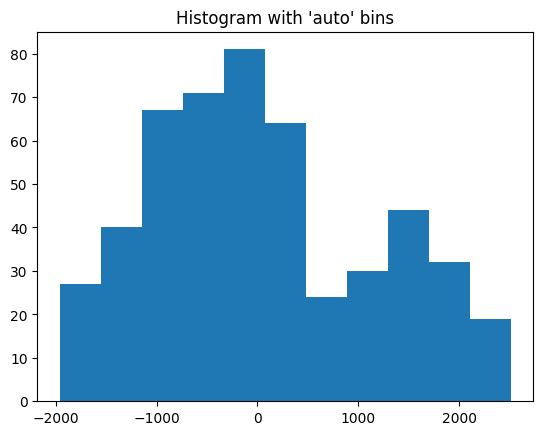

In [15]:
## Histogram
rate, data = wavfile.read(output_file_path)
print("All data: ", data)
print("Number of sample in data: ", len(data))

c=data[0:499]
print("Number of sample in c: ", len(c))

plt.hist(c, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.show()